# LDA모델을 활용하여 영어 지문 분석하여 정답유추하기

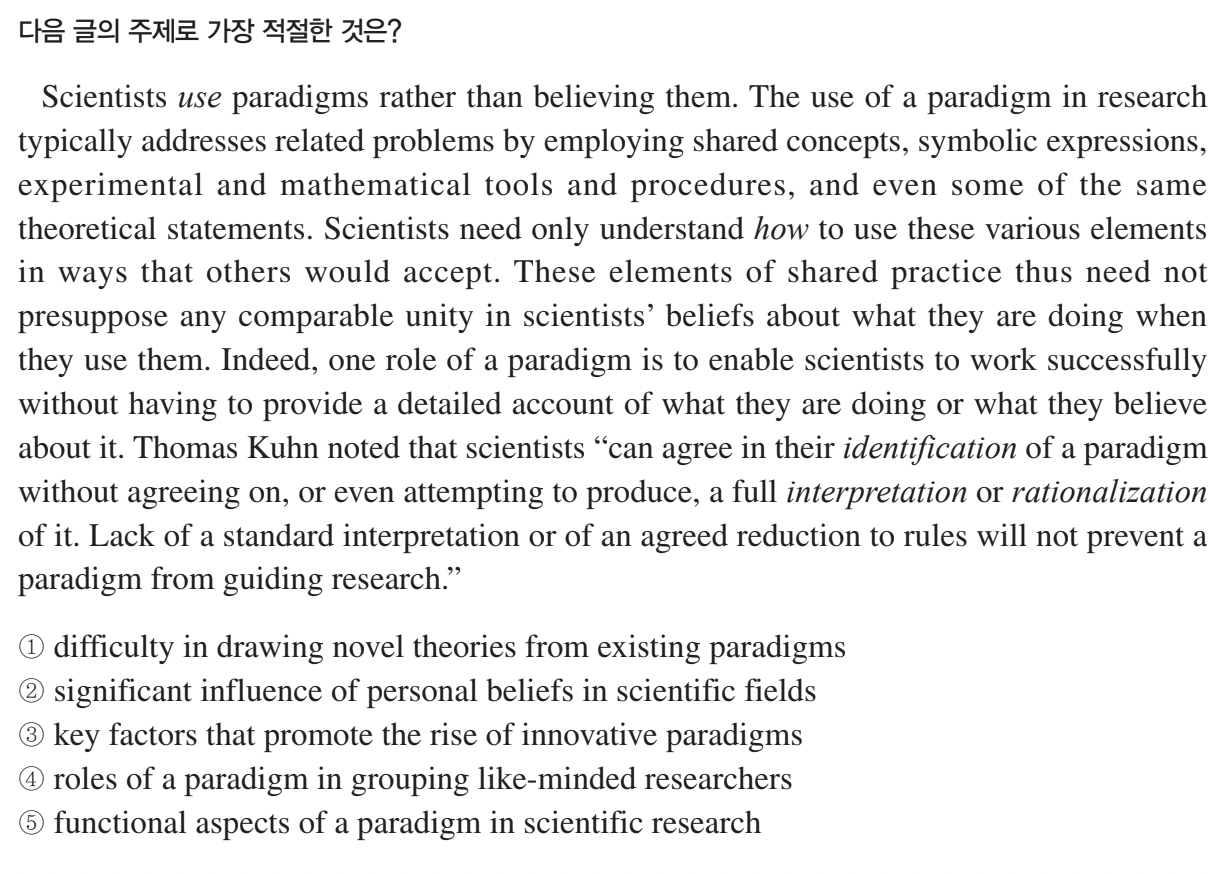

## 프로젝트의 가정

본문의 주제를 찾는 것이기 때문에 토픽 분석을 통해서 나오는 단어들을 통해서 정답을 유추할 수 있다는 가정을 가지고 프로젝트를 진행합니다.

## 정답 유추 과정

1.   본문에 나오는 지문 전처리
2.   LDA모델을 활용하여 토픽을 단어 추출
3.   보기 전처리
4.   토픽 단어와 보기의 단어를 비교
5.   정답 유추하기

In [1]:
import re
import nltk
import gensim
import pandas as pd

from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nsun5\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nsun5\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# 토큰화 설정
tokenizer = RegexpTokenizer('[\w]+')

# 불용어 설정
stopwords = stopwords.words('english')

# 표제어 추출 설정
lemmatizer = WordNetLemmatizer()

In [3]:
번호 = '1번'
topicnumber = 10

## 문제 본문 불러오기

In [8]:
# 파일 불러오기
with open('22수능 영어23_문제.txt','r') as f:
    rowdata = f.readlines()

rowdata

['Scientists use paradigms rather than believing them. The use of a paradigm in research typically addresses related problems by employing shared concepts, symbolic expressions, experimental and mathematical tools and procedures, and even some of the same theoretical statements. Scientists need only understand how to use these various elements in ways that others would accept. These elements of shared practice thus need not presuppose any comparable unity in scientists’ beliefs about what they are doing when they use them. Indeed, one role of a paradigm is to enable scientists to work successfully without having to provide a detailed account of what they are doing or what they believe about it. Thomas Kuhn noted that scientists “can agree in their identification of a paradigm without agreeing on, or even attempting to produce, a full interpretation or rationalization of it. Lack of a standard interpretation or of an agreed reduction to rules will not prevent a paradigm from guiding res

In [9]:
# rowdata에 0번 인덱스 자료를 소문자로 변형
text = rowdata[0].lower()
text

'scientists use paradigms rather than believing them. the use of a paradigm in research typically addresses related problems by employing shared concepts, symbolic expressions, experimental and mathematical tools and procedures, and even some of the same theoretical statements. scientists need only understand how to use these various elements in ways that others would accept. these elements of shared practice thus need not presuppose any comparable unity in scientists’ beliefs about what they are doing when they use them. indeed, one role of a paradigm is to enable scientists to work successfully without having to provide a detailed account of what they are doing or what they believe about it. thomas kuhn noted that scientists “can agree in their identification of a paradigm without agreeing on, or even attempting to produce, a full interpretation or rationalization of it. lack of a standard interpretation or of an agreed reduction to rules will not prevent a paradigm from guiding rese

In [10]:
# 설정한 tokenizer를 활용하여 토큰화
tokens = tokenizer.tokenize(text)
tokens

['scientists',
 'use',
 'paradigms',
 'rather',
 'than',
 'believing',
 'them',
 'the',
 'use',
 'of',
 'a',
 'paradigm',
 'in',
 'research',
 'typically',
 'addresses',
 'related',
 'problems',
 'by',
 'employing',
 'shared',
 'concepts',
 'symbolic',
 'expressions',
 'experimental',
 'and',
 'mathematical',
 'tools',
 'and',
 'procedures',
 'and',
 'even',
 'some',
 'of',
 'the',
 'same',
 'theoretical',
 'statements',
 'scientists',
 'need',
 'only',
 'understand',
 'how',
 'to',
 'use',
 'these',
 'various',
 'elements',
 'in',
 'ways',
 'that',
 'others',
 'would',
 'accept',
 'these',
 'elements',
 'of',
 'shared',
 'practice',
 'thus',
 'need',
 'not',
 'presuppose',
 'any',
 'comparable',
 'unity',
 'in',
 'scientists',
 'beliefs',
 'about',
 'what',
 'they',
 'are',
 'doing',
 'when',
 'they',
 'use',
 'them',
 'indeed',
 'one',
 'role',
 'of',
 'a',
 'paradigm',
 'is',
 'to',
 'enable',
 'scientists',
 'to',
 'work',
 'successfully',
 'without',
 'having',
 'to',
 'provide',


In [11]:
# 문자의 길이가 한 단어 이하일 경우 삭제
shorted_tokens = [i for i in tokens if len(i) > 1]
shorted_tokens

['scientists',
 'use',
 'paradigms',
 'rather',
 'than',
 'believing',
 'them',
 'the',
 'use',
 'of',
 'paradigm',
 'in',
 'research',
 'typically',
 'addresses',
 'related',
 'problems',
 'by',
 'employing',
 'shared',
 'concepts',
 'symbolic',
 'expressions',
 'experimental',
 'and',
 'mathematical',
 'tools',
 'and',
 'procedures',
 'and',
 'even',
 'some',
 'of',
 'the',
 'same',
 'theoretical',
 'statements',
 'scientists',
 'need',
 'only',
 'understand',
 'how',
 'to',
 'use',
 'these',
 'various',
 'elements',
 'in',
 'ways',
 'that',
 'others',
 'would',
 'accept',
 'these',
 'elements',
 'of',
 'shared',
 'practice',
 'thus',
 'need',
 'not',
 'presuppose',
 'any',
 'comparable',
 'unity',
 'in',
 'scientists',
 'beliefs',
 'about',
 'what',
 'they',
 'are',
 'doing',
 'when',
 'they',
 'use',
 'them',
 'indeed',
 'one',
 'role',
 'of',
 'paradigm',
 'is',
 'to',
 'enable',
 'scientists',
 'to',
 'work',
 'successfully',
 'without',
 'having',
 'to',
 'provide',
 'detailed',

In [12]:
# 설정한 불용어를 제거
stopped_tokens = [i for i in shorted_tokens if not i in stopwords]
stopped_tokens

['scientists',
 'use',
 'paradigms',
 'rather',
 'believing',
 'use',
 'paradigm',
 'research',
 'typically',
 'addresses',
 'related',
 'problems',
 'employing',
 'shared',
 'concepts',
 'symbolic',
 'expressions',
 'experimental',
 'mathematical',
 'tools',
 'procedures',
 'even',
 'theoretical',
 'statements',
 'scientists',
 'need',
 'understand',
 'use',
 'various',
 'elements',
 'ways',
 'others',
 'would',
 'accept',
 'elements',
 'shared',
 'practice',
 'thus',
 'need',
 'presuppose',
 'comparable',
 'unity',
 'scientists',
 'beliefs',
 'use',
 'indeed',
 'one',
 'role',
 'paradigm',
 'enable',
 'scientists',
 'work',
 'successfully',
 'without',
 'provide',
 'detailed',
 'account',
 'believe',
 'thomas',
 'kuhn',
 'noted',
 'scientists',
 'agree',
 'identification',
 'paradigm',
 'without',
 'agreeing',
 'even',
 'attempting',
 'produce',
 'full',
 'interpretation',
 'rationalization',
 'lack',
 'standard',
 'interpretation',
 'agreed',
 'reduction',
 'rules',
 'prevent',
 'pa

In [13]:
# 설정한 표제어 추출 함수를 활용하여 표제어 추출
ltokens = [lemmatizer.lemmatize(i) for i in stopped_tokens]
ltokens

['scientist',
 'use',
 'paradigm',
 'rather',
 'believing',
 'use',
 'paradigm',
 'research',
 'typically',
 'address',
 'related',
 'problem',
 'employing',
 'shared',
 'concept',
 'symbolic',
 'expression',
 'experimental',
 'mathematical',
 'tool',
 'procedure',
 'even',
 'theoretical',
 'statement',
 'scientist',
 'need',
 'understand',
 'use',
 'various',
 'element',
 'way',
 'others',
 'would',
 'accept',
 'element',
 'shared',
 'practice',
 'thus',
 'need',
 'presuppose',
 'comparable',
 'unity',
 'scientist',
 'belief',
 'use',
 'indeed',
 'one',
 'role',
 'paradigm',
 'enable',
 'scientist',
 'work',
 'successfully',
 'without',
 'provide',
 'detailed',
 'account',
 'believe',
 'thomas',
 'kuhn',
 'noted',
 'scientist',
 'agree',
 'identification',
 'paradigm',
 'without',
 'agreeing',
 'even',
 'attempting',
 'produce',
 'full',
 'interpretation',
 'rationalization',
 'lack',
 'standard',
 'interpretation',
 'agreed',
 'reduction',
 'rule',
 'prevent',
 'paradigm',
 'guiding'

In [15]:
#이차원 리스트를 만들어주기 위해 토큰화한 리스트를 다시 리스트에 추가
data = [ltokens]
data

[['scientist',
  'use',
  'paradigm',
  'rather',
  'believing',
  'use',
  'paradigm',
  'research',
  'typically',
  'address',
  'related',
  'problem',
  'employing',
  'shared',
  'concept',
  'symbolic',
  'expression',
  'experimental',
  'mathematical',
  'tool',
  'procedure',
  'even',
  'theoretical',
  'statement',
  'scientist',
  'need',
  'understand',
  'use',
  'various',
  'element',
  'way',
  'others',
  'would',
  'accept',
  'element',
  'shared',
  'practice',
  'thus',
  'need',
  'presuppose',
  'comparable',
  'unity',
  'scientist',
  'belief',
  'use',
  'indeed',
  'one',
  'role',
  'paradigm',
  'enable',
  'scientist',
  'work',
  'successfully',
  'without',
  'provide',
  'detailed',
  'account',
  'believe',
  'thomas',
  'kuhn',
  'noted',
  'scientist',
  'agree',
  'identification',
  'paradigm',
  'without',
  'agreeing',
  'even',
  'attempting',
  'produce',
  'full',
  'interpretation',
  'rationalization',
  'lack',
  'standard',
  'interpreta

In [16]:
# 단어 라벨링과 빈도수 기록
dictionary = corpora.Dictionary(data)

for i in dictionary :
  print(dictionary[i])

corpus = [dictionary.doc2bow(text) for text in data]
corpus

accept
account
address
agree
agreed
agreeing
attempting
belief
believe
believing
comparable
concept
detailed
element
employing
enable
even
experimental
expression
full
guiding
identification
indeed
interpretation
kuhn
lack
mathematical
need
noted
one
others
paradigm
practice
presuppose
prevent
problem
procedure
produce
provide
rather
rationalization
reduction
related
research
role
rule
scientist
shared
standard
statement
successfully
symbolic
theoretical
thomas
thus
tool
typically
understand
unity
use
various
way
without
work
would


[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 2),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 2),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 2),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 5),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 2),
  (44, 1),
  (45, 1),
  (46, 5),
  (47, 2),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 4),
  (60, 1),
  (61, 1),
  (62, 2),
  (63, 1),
  (64, 1)]]

In [17]:
# LDA 모델 훈련 및 토픽 결과 확인

ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=1, id2word=dictionary)
t = ldamodel.print_topics(num_words=topicnumber)
t

[(0,
  '0.041*"scientist" + 0.041*"paradigm" + 0.034*"use" + 0.020*"element" + 0.020*"research" + 0.020*"shared" + 0.020*"even" + 0.020*"interpretation" + 0.020*"without" + 0.020*"need"')]

In [18]:
# 기여도를 제외한 토픽만 확인하기
topic = re.findall('[a-z]+',t[0][1])
topic

['scientist',
 'paradigm',
 'use',
 'element',
 'research',
 'shared',
 'even',
 'interpretation',
 'without',
 'need']

## 보기 분석

In [19]:
with open('22수능 영어23_보기.txt', 'r') as f:
    n = f.readlines()
n

['difficulty in drawing novel theories from existing paradigms\n',
 'significant influence of personal beliefs in scientific fields\n',
 'key factors that promote the rise of innovative paradigms\n',
 'roles of a paradigm in grouping like-minded researchers\n',
 'functional aspects of a paradigm in scientific research']

보기 전처리
- 단어 정규화(소문자로 변형)
- 토큰화
- 불용어 제거
- 표제어 추출

In [20]:
data2 = []

for w in n:
  rawdata2 = w.lower()
  tokens2 = tokenizer.tokenize(rawdata2)
  stopped_tokens2 = [i for i in tokens2 if i not in stopwords]
  lemmed_tokens2 = [lemmatizer.lemmatize(i) for i in stopped_tokens2]
  data2.append(lemmed_tokens2)

data2

[['difficulty', 'drawing', 'novel', 'theory', 'existing', 'paradigm'],
 ['significant', 'influence', 'personal', 'belief', 'scientific', 'field'],
 ['key', 'factor', 'promote', 'rise', 'innovative', 'paradigm'],
 ['role', 'paradigm', 'grouping', 'like', 'minded', 'researcher'],
 ['functional', 'aspect', 'paradigm', 'scientific', 'research']]

## 정답 유추

In [21]:
for i in data2 :
  tlist = [j for j in i if j in topic]
  print(tlist)

['paradigm']
[]
['paradigm']
['paradigm']
['paradigm', 'research']


따라서 연관성이 가장 높은 5번이 정답.